# Problem Statement:
BoomBikes, a US-based bike-sharing provider, has faced significant revenue losses due to the COVID-19 pandemic. To recover, the company aims to devise a business plan by analyzing the demand for shared bikes post-lockdown. They seek to understand the factors influencing bike demand to effectively cater to customer needs, outperform competitors, and maximize profits.

*Objective:*
Using a large dataset on daily bike demand and influencing factors, develop a predictive model to:

- Identify significant variables affecting bike demand.
- Assess how these variables explain demand patterns.

*Business Goal:*
The model will guide BoomBikes in adjusting their business strategy, aligning with customer expectations, and understanding demand dynamics in new markets.

In [111]:
import warnings
warnings.filterwarnings('ignore')

In [112]:
#import numpy, pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [114]:
# checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [115]:
data.dteday = pd.to_datetime(data.dteday, format='%d-%m-%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [116]:

data.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2018-12-31 12:00:00,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
min,1.000000,2018-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2018-07-02 06:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,2018-12-31 12:00:00,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,2019-07-01 18:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,2019-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647


In [117]:
# Removing instant as it doesnot effect the analysis
data.drop(['instant'], axis=1, inplace=True)

In [118]:
data.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

# Check the relation between variables

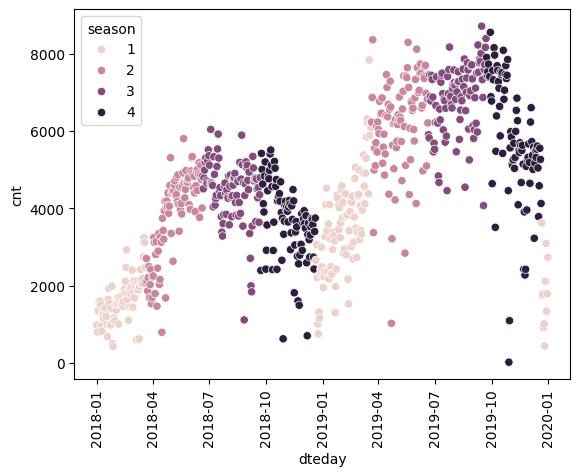

In [119]:
sns.scatterplot(x=data.dteday, y=data.cnt, hue=data.season)
plt.xticks(rotation=90)
plt.show()

Observation
- As the winter season starts, the bike sharing count is dropping and start picking up as the spring starts
- Most of the summer and fall season, the sharing count is uniform

<Axes: xlabel='season', ylabel='cnt'>

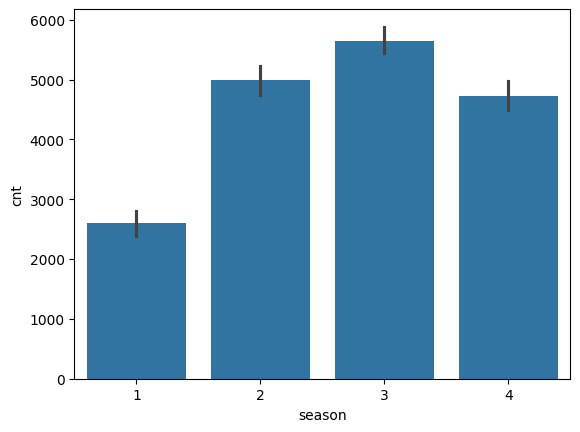

In [120]:
sns.barplot(x=data.season, y=data.cnt)

<Axes: xlabel='weathersit', ylabel='cnt'>

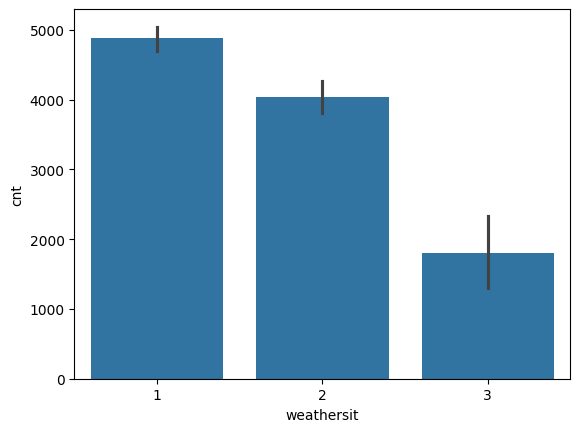

In [121]:
sns.barplot(x=data.weathersit, y=data.cnt)

Observation
- rainy days effects the dropping of bike sharing

<Axes: xlabel='weathersit', ylabel='cnt'>

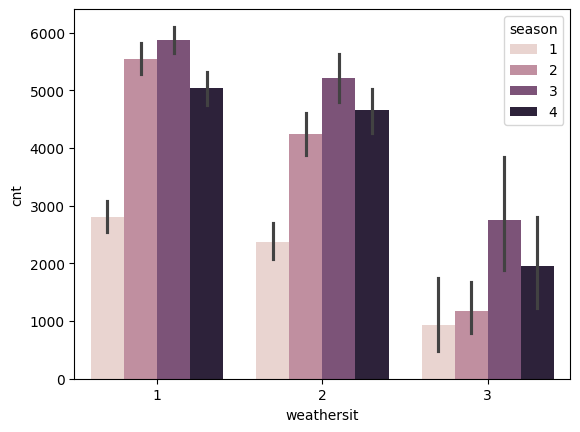

In [122]:
sns.barplot(x=data.weathersit, y=data.cnt, hue=data.season)
# weathersit : 
# 		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# season : season (1:spring, 2:summer, 3:fall, 4:winter)

<Axes: xlabel='yr', ylabel='cnt'>

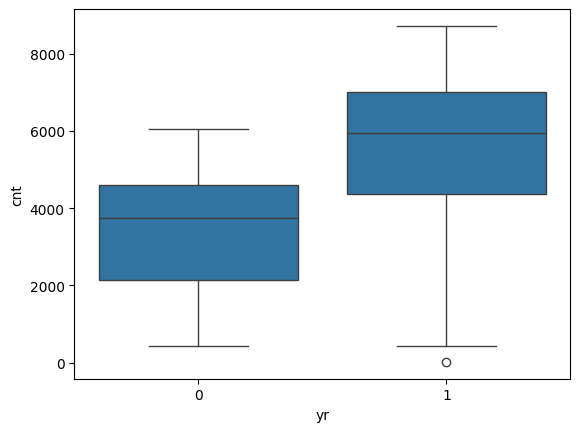

In [123]:
sns.boxplot(x=data.yr, y=data.cnt)

<Axes: xlabel='mnth', ylabel='cnt'>

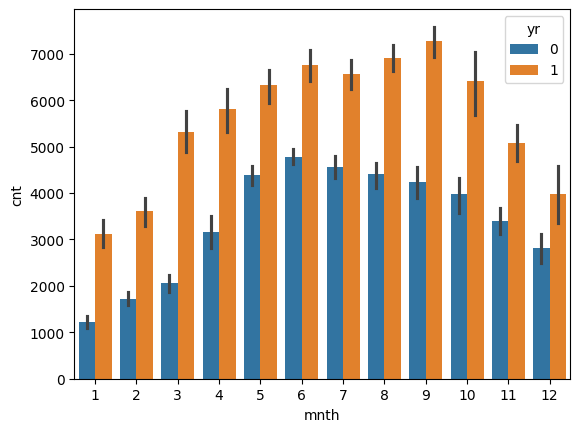

In [124]:
sns.barplot(data=data, x='mnth', y='cnt', hue='yr')

<Axes: xlabel='workingday', ylabel='cnt'>

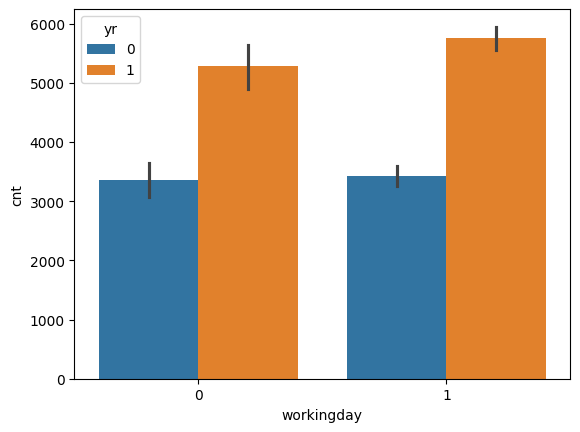

In [125]:
sns.barplot(data=data, x='workingday', y='cnt', hue='yr')

- Business has grown in 2019

# Dummy Variables

In [126]:
#'weathersit' and 'season' are category variables with more than 2 types of categories lets create dummies to those variables
weatherSitDummies = pd.get_dummies(data.weathersit, drop_first=True, dtype=int, )
weatherSitDummies.rename(columns={2:'mist_cloudy', 3: 'rainy'}, inplace=True)

In [127]:
season_dummies = pd.get_dummies(data.season, drop_first=True, dtype=int)
season_dummies.rename(columns={1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)

In [128]:
data = pd.concat([data, weatherSitDummies, season_dummies], axis=1)
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mist_cloudy,rainy,summer,fall,winter
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,0
1,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0
2,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


In [129]:
# drop original season and weathersit columns as the dummy variables have been defined for them
# drop dteday column as the yr, mnth and weekday defines the dteday
data.drop(['season', 'weathersit', 'dteday'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           730 non-null    int64  
 1   mnth         730 non-null    int64  
 2   holiday      730 non-null    int64  
 3   weekday      730 non-null    int64  
 4   workingday   730 non-null    int64  
 5   temp         730 non-null    float64
 6   atemp        730 non-null    float64
 7   hum          730 non-null    float64
 8   windspeed    730 non-null    float64
 9   casual       730 non-null    int64  
 10  registered   730 non-null    int64  
 11  cnt          730 non-null    int64  
 12  mist_cloudy  730 non-null    int64  
 13  rainy        730 non-null    int64  
 14  summer       730 non-null    int64  
 15  fall         730 non-null    int64  
 16  winter       730 non-null    int64  
dtypes: float64(4), int64(13)
memory usage: 97.1 KB


# Splitting the data to training and test data sets

In [130]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)

In [131]:
print("data_train shape: ", data_train.shape )
data_train.head()

data_train shape:  (510, 17)


,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,mist_cloudy,rainy,summer,fall,winter
653,1,10,0,2,1,19.201653,23.0423,55.8333,12.208807,922,6612,7534,0,0,0,0,1
576,1,7,0,2,1,29.246653,33.1448,70.4167,11.083475,968,6248,7216,0,0,0,1,0
426,1,3,0,6,0,16.980847,20.6746,62.1250,10.792293,956,3110,4066,1,0,0,0,0
728,1,12,0,0,0,10.489153,11.5850,48.3333,23.500518,364,1432,1796,0,0,0,0,0
482,1,4,0,6,0,15.443347,18.8752,48.9583,8.708325,1120,3100,4220,1,0,1,0,0


In [132]:
print("data_test shape: ", data_test.shape )
data_test.head()

data_test shape:  (219, 17)


,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,mist_cloudy,rainy,summer,fall,winter
184,0,7,1,1,0,29.793347,33.27085,63.7917,5.459106,3065,2978,6043,1,0,0,1,0
535,1,6,0,3,1,32.082500,36.04875,59.2083,7.625404,872,5339,6211,0,0,1,0,0
299,0,10,0,4,1,19.270000,22.85230,81.2917,13.250121,240,2419,2659,1,0,0,0,1
221,0,8,0,3,1,31.433347,34.24915,42.4167,13.417286,884,3896,4780,0,0,0,1,0
152,0,6,0,4,1,29.315000,32.19710,30.5000,19.583229,736,4232,4968,0,0,1,0,0


<Axes: ylabel='Count'>

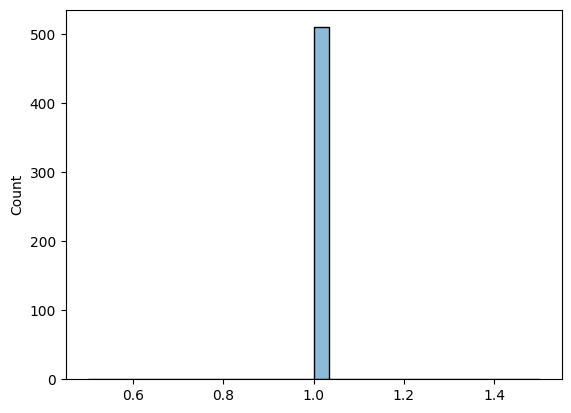

In [133]:
ratio = data_train['registered'].add(data_train['casual']).div(data_train['cnt'])
sns.histplot(ratio, bins=30, kde=True)

# Rescaling the features

In [134]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [135]:
variablesToScale = ['mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
data_train[variablesToScale] = scaler.fit_transform(data_train[variablesToScale])
data_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,mist_cloudy,rainy,summer,fall,winter
653,1,0.818182,0,0.333333,1,0.509887,0.501133,0.575354,0.300794,922,6612,0.864243,0,0,0,0,1
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,968,6248,0.827658,0,0,0,1,0
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,956,3110,0.465255,1,0,0,0,0
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,364,1432,0.204096,0,0,0,0,0
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,1120,3100,0.482973,1,0,1,0,0


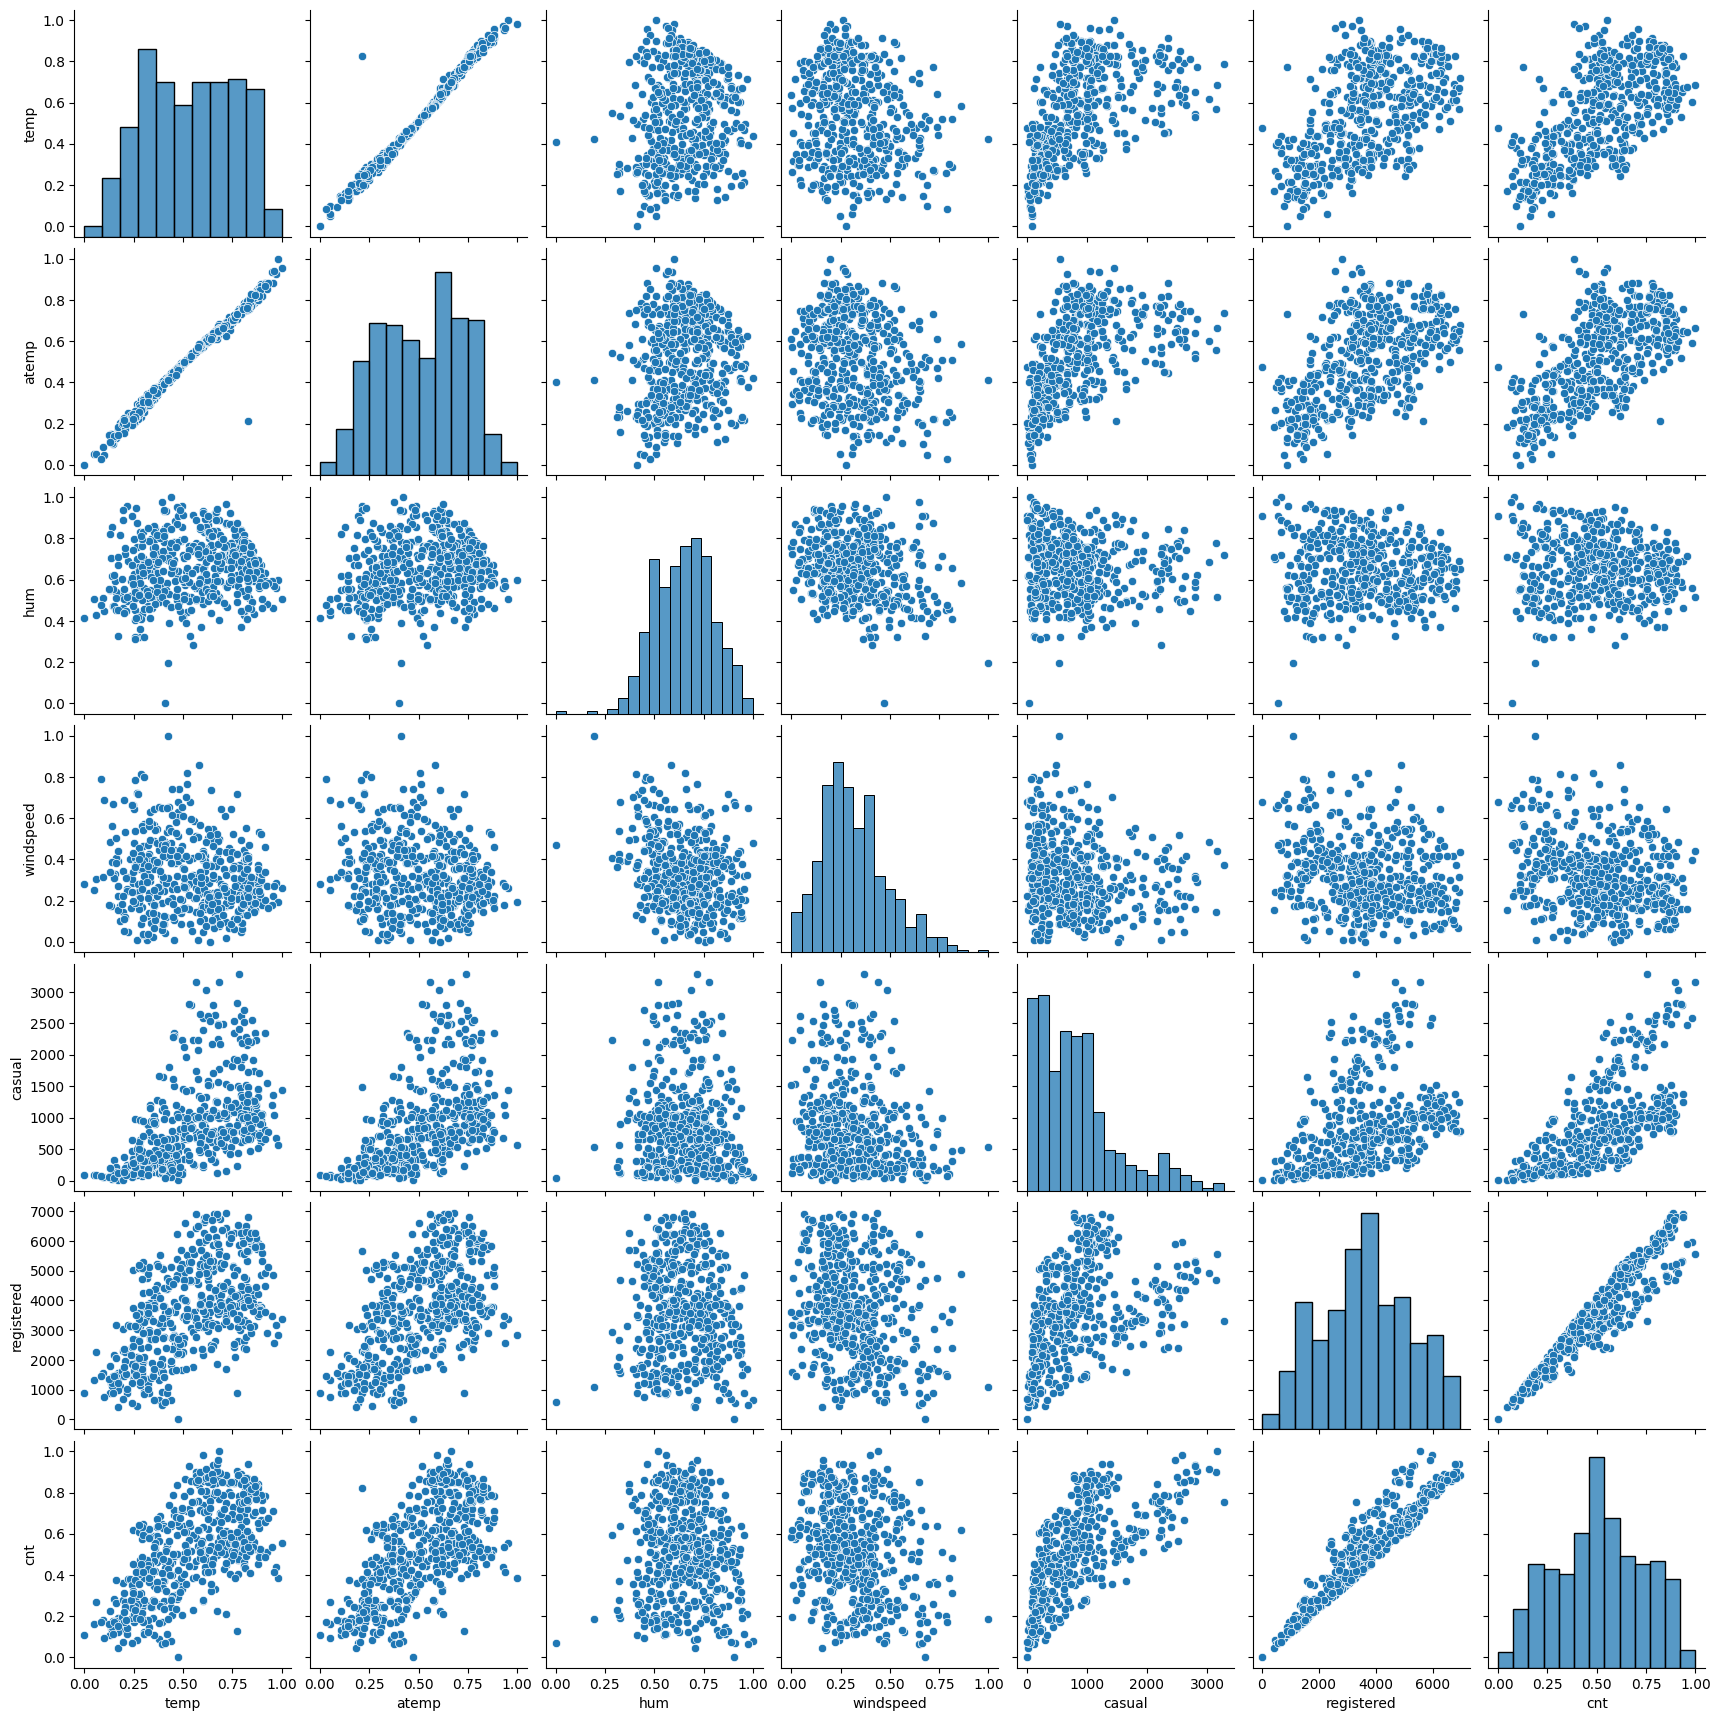

In [136]:
sns.pairplot(data=data_train[data_train.columns[5:12]])


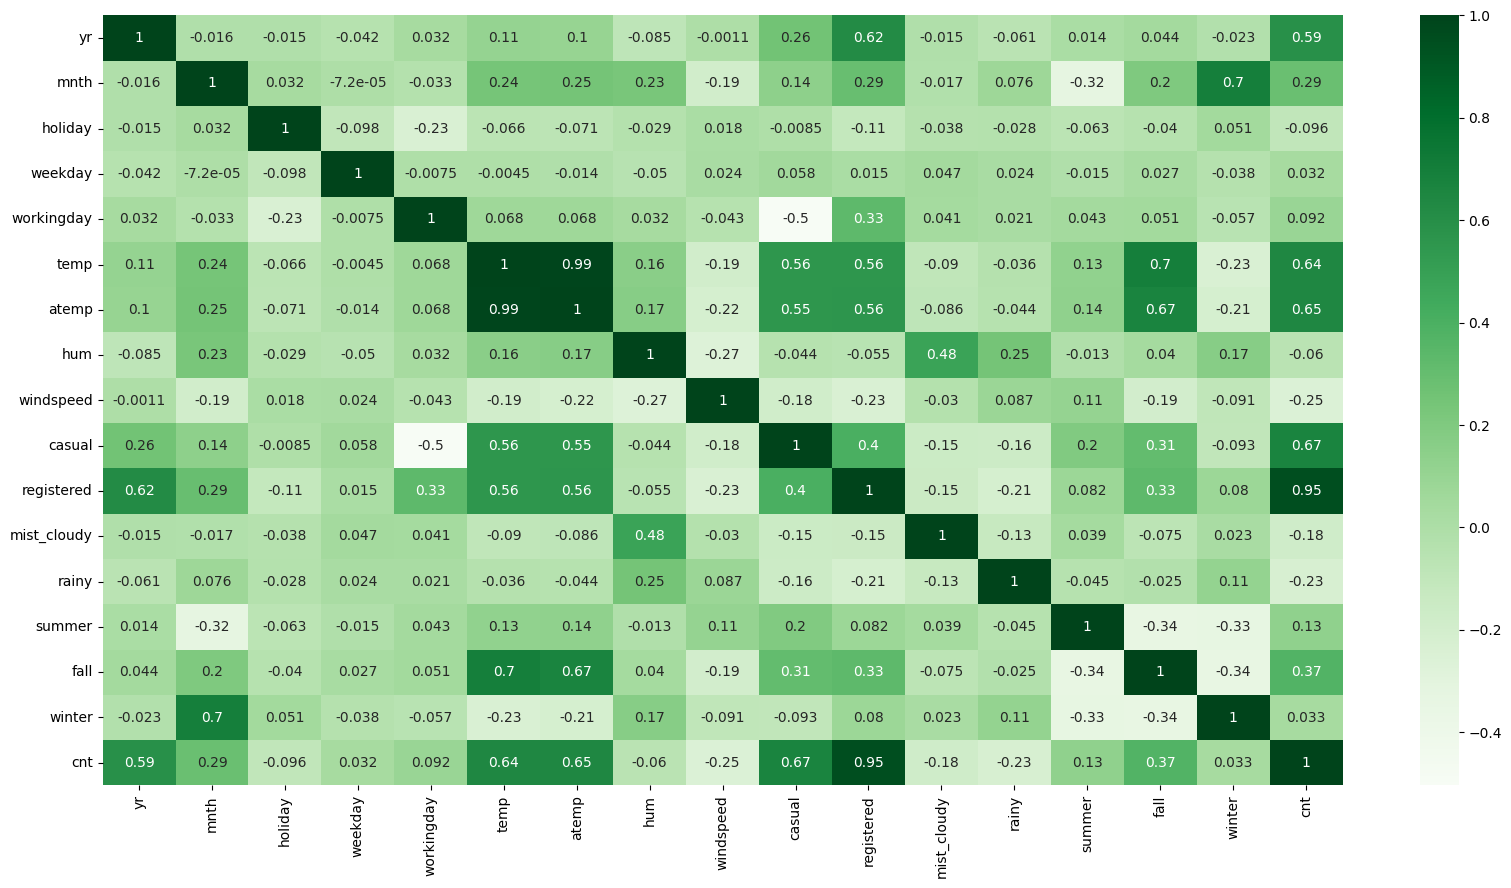

In [137]:
temp = data_train.pop('cnt')
data_train = pd.concat([data_train, temp], axis=1, ) # change done for reading heatmap comfortably
plt.figure(figsize=[20,10])
sns.heatmap(data_train.corr(), annot=True, cmap='Greens')
plt.show()

**Observation**
- temp and atemp are highly correlated, so we can have one of them. So, removing atemp
- The sum of casual and registered will give the cnt. These variables will directly effect the cnt and also they are highly correlated to the cnt variable. So deleting the casual and registered variables

In [138]:
data_train.drop(['atemp', 'casual', 'registered'], axis=1, inplace=True)
data_train.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'hum',
       'windspeed', 'mist_cloudy', 'rainy', 'summer', 'fall', 'winter', 'cnt'],
      dtype='object')

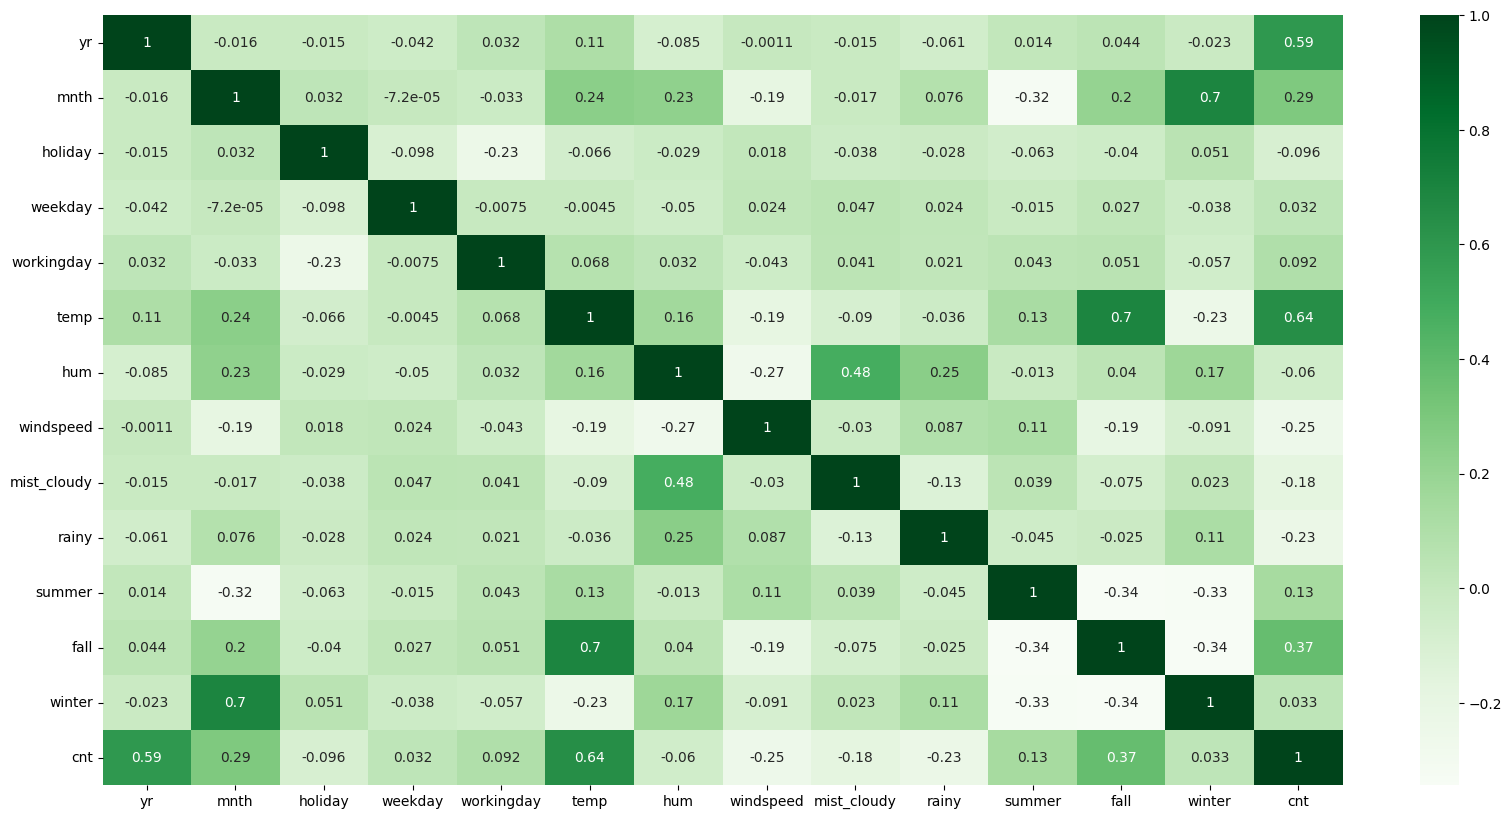

In [139]:
plt.figure(figsize=[20,10])
sns.heatmap(data_train.corr(), annot=True, cmap='Greens')
plt.show()

# Preparing the feature and target sets
X = ['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'hum',
       'windspeed', 'mist_cloudy', 'rainy', 'summer', 'fall', 'winter']<br>
y = ['cnt']

In [140]:
y_train = data_train.pop('cnt')
X_train = data_train

In [141]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [142]:
X_train.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,mist_cloudy,rainy,summer,fall,winter
653,1,0.818182,0,0.333333,1,0.509887,0.575354,0.300794,0,0,0,0,1
576,1,0.545455,0,0.333333,1,0.815169,0.725633,0.264686,0,0,0,1,0
426,1,0.181818,0,1.000000,0,0.442393,0.640189,0.255342,1,0,0,0,0
728,1,1.000000,0,0.000000,0,0.245101,0.498067,0.663106,0,0,0,0,0
482,1,0.272727,0,1.000000,0,0.395666,0.504508,0.188475,1,0,1,0,0


# Building a Linear Model through Forward Selection

In [143]:
# Using temperature variable to build a linear model as its correlation with cnt is comparitively high
import statsmodels.api as sm
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [144]:
lr.params

const    0.169798
temp     0.639952
dtype: float64

In [145]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           5.80e-61
Time:                        21:24:41   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation**
- Prob(F-static) is considerably small, P-value of 'temp' variable is 0 which states that the variable is good and the model holds good.
- R-squared states that the 41% of the variance is explained by this variable.
- Equation formed is: cnt = 0.6400(temp) + 0.1698

# Adding another variable

In [146]:
X_train_lm = X_train[['temp', 'yr']]
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          9.25e-130
Time:                        21:24:41   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.000       0.050       0.109
temp           0.5836      0.025     23.604      0.000       0.535       0.632
yr             0.2372      0.011     21.261      0.000       0.215       0.259
==============================================================================
Omnibus:                       31.402   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.724
Skew:                          -0.503   Prob(JB):                     5.28e-10
Kurtosis:                       4.000   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation**
- R-squared has increased by 28%. 69% of variance is explained by these variables
- P-Values have been zeroes and P(F-stat) is low ensuring that the model holds good
- equation is : cnt = 0.5836(temp) + 0.2372(yr) + 0.0796	

In [147]:
# lets add fall to the model
X_train_lm = X_train[['temp','yr', 'fall']]

In [148]:
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const    0.051837
temp     0.666540
yr       0.235552
fall    -0.060695
dtype: float64

In [149]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     389.0
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          6.16e-131
Time:                        21:24:41   Log-Likelihood:                 343.43
No. Observations:                 510   AIC:                            -678.9
Df Residuals:                     506   BIC:                            -661.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0518      0.017      3.087      0.002       0.019       0.085
temp           0.6665      0.034     19.531      0.000       0.599       0.734
yr             0.2356      0.011     21.323      0.000       0.214       0.257
fall          -0.0607      0.017     -3.486      0.001      -0.095      -0.026
==============================================================================
Omnibus:                       36.351   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.794
Skew:                          -0.531   Prob(JB):                     2.08e-12
Kurtosis:                       4.185   Cond. No.                         9.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation**
- There is ~08% increase in R-square
- p-values of variables holds good
- Equation is cnt = 0.6665(temp) + 0.2356(yr) - 0.0607(fall) + 0.0518
- The 'fall' has not effected the variable much. we can omit fall variable. lets take that decision at the end.

In [150]:
# Adding month variable to the model
X_train_lm = X_train[['temp', 'yr', 'fall', 'mnth']]
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const    0.008852
temp     0.633859
yr       0.238587
fall    -0.066786
mnth     0.120134
dtype: float64

In [151]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     331.5
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.02e-139
Time:                        21:24:42   Log-Likelihood:                 366.99
No. Observations:                 510   AIC:                            -724.0
Df Residuals:                     505   BIC:                            -702.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0089      0.017      0.515      0.607      -0.025       0.043
temp           0.6339      0.033     19.236      0.000       0.569       0.699
yr             0.2386      0.011     22.577      0.000       0.218       0.259
fall          -0.0668      0.017     -4.008      0.000      -0.100      -0.034
mnth           0.1201      0.017      6.991      0.000       0.086       0.154
==============================================================================
Omnibus:                       86.181   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.283
Skew:                          -0.907   Prob(JB):                     2.15e-41
Kurtosis:                       5.350   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation**
- 3% of R-Squared in increased. F-Static still holds good for model
- P-Values are all ~0

In [152]:
# Adding windspeed to the model
X_train_lm = X_train[['temp', 'yr', 'mnth', 'windspeed']]
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train,X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     342.5
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.60e-142
Time:                        21:24:42   Log-Likelihood:                 373.02
No. Observations:                 510   AIC:                            -736.0
Df Residuals:                     505   BIC:                            -714.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1115      0.020      5.555      0.000       0.072       0.151
temp           0.5245      0.024     21.779      0.000       0.477       0.572
yr             0.2410      0.010     23.099      0.000       0.221       0.262
mnth           0.1027      0.017      5.990      0.000       0.069       0.136
windspeed     -0.1681      0.031     -5.343      0.000      -0.230      -0.106
==============================================================================
Omnibus:                       54.695   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.805
Skew:                          -0.688   Prob(JB):                     1.16e-20
Kurtosis:                       4.558   Cond. No.                         9.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
X_train_lm = X_train[['temp', 'yr', 'mnth', 'windspeed', 'rainy']]
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train,X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     322.6
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.75e-154
Time:                        21:24:42   Log-Likelihood:                 404.47
No. Observations:                 510   AIC:                            -796.9
Df Residuals:                     504   BIC:                            -771.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1100      0.019      5.824      0.000       0.073       0.147
temp           0.5181      0.023     22.844      0.000       0.474       0.563
yr             0.2366      0.010     24.057      0.000       0.217       0.256
mnth           0.1158      0.016      7.140      0.000       0.084       0.148
windspeed     -0.1446      0.030     -4.860      0.000      -0.203      -0.086
rainy         -0.2373      0.029     -8.133      0.000      -0.295      -0.180
==============================================================================
Omnibus:                       33.183   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.199
Skew:                          -0.516   Prob(JB):                     9.29e-11
Kurtosis:                       4.053   Cond. No.                         9.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
X_train_lm = X_train[['temp', 'yr', 'mnth', 'windspeed', 'rainy', 'mist_cloudy']]
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train,X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     302.6
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.42e-163
Time:                        21:24:42   Log-Likelihood:                 428.18
No. Observations:                 510   AIC:                            -842.4
Df Residuals:                     503   BIC:                            -812.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1449      0.019      7.738      0.000       0.108       0.182
temp            0.5030      0.022     23.098      0.000       0.460       0.546
yr              0.2358      0.009     25.090      0.000       0.217       0.254
mnth            0.1169      0.016      7.543      0.000       0.086       0.147
windspeed      -0.1517      0.028     -5.333      0.000      -0.208      -0.096
rainy          -0.2623      0.028     -9.333      0.000      -0.317      -0.207
mist_cloudy    -0.0696      0.010     -7.002      0.000      -0.089      -0.050
==============================================================================
Omnibus:                       42.974   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.952
Skew:                          -0.553   Prob(JB):                     8.74e-17
Kurtosis:                       4.503   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
X_train_lm = X_train[['temp', 'yr', 'mnth', 'windspeed', 'rainy', 'mist_cloudy', 'summer' ]]
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train,X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     290.4
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          5.43e-172
Time:                        21:24:42   Log-Likelihood:                 451.42
No. Observations:                 510   AIC:                            -886.8
Df Residuals:                     502   BIC:                            -853.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1314      0.018      7.298      0.000       0.096       0.167
temp            0.4680      0.021     21.831      0.000       0.426       0.510
yr              0.2370      0.009     26.356      0.000       0.219       0.255
mnth            0.1555      0.016      9.817      0.000       0.124       0.187
windspeed      -0.1693      0.027     -6.194      0.000      -0.223      -0.116
rainy          -0.2601      0.027     -9.677      0.000      -0.313      -0.207
mist_cloudy    -0.0736      0.010     -7.721      0.000      -0.092      -0.055
summer          0.0782      0.011      6.921      0.000       0.056       0.100
==============================================================================
Omnibus:                       58.385   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.196
Skew:                          -0.650   Prob(JB):                     4.82e-27
Kurtosis:                       5.003   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation**
- 80% of variance is explained by variables ['temp', 'yr', 'mnth', 'windspeed', 'rainy', 'mist_cloudy', 'summer' ]

In [156]:
X_train_lm = X_train[['temp', 'yr', 'mnth', 'windspeed', 'rainy', 'mist_cloudy', 'summer', 'holiday' ]]
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train,X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     260.3
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          5.23e-173
Time:                        21:24:42   Log-Likelihood:                 456.74
No. Observations:                 510   AIC:                            -895.5
Df Residuals:                     501   BIC:                            -857.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1359      0.018      7.593      0.000       0.101       0.171
temp            0.4634      0.021     21.772      0.000       0.422       0.505
yr              0.2367      0.009     26.574      0.000       0.219       0.254
mnth            0.1574      0.016     10.024      0.000       0.127       0.188
windspeed      -0.1676      0.027     -6.193      0.000      -0.221      -0.114
rainy          -0.2639      0.027     -9.900      0.000      -0.316      -0.212
mist_cloudy    -0.0750      0.009     -7.939      0.000      -0.094      -0.056
summer          0.0767      0.011      6.852      0.000       0.055       0.099
holiday        -0.0916      0.028     -3.250      0.001      -0.147      -0.036
==============================================================================
Omnibus:                       52.911   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.155
Skew:                          -0.606   Prob(JB):                     8.89e-24
Kurtosis:                       4.878   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation: holiday has not much influence**

In [157]:
X_train_lm = X_train[['temp', 'yr', 'mnth', 'windspeed', 'rainy', 'mist_cloudy', 'summer']]
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train,X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     290.4
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          5.43e-172
Time:                        21:24:42   Log-Likelihood:                 451.42
No. Observations:                 510   AIC:                            -886.8
Df Residuals:                     502   BIC:                            -853.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1314      0.018      7.298      0.000       0.096       0.167
temp            0.4680      0.021     21.831      0.000       0.426       0.510
yr              0.2370      0.009     26.356      0.000       0.219       0.255
mnth            0.1555      0.016      9.817      0.000       0.124       0.187
windspeed      -0.1693      0.027     -6.194      0.000      -0.223      -0.116
rainy          -0.2601      0.027     -9.677      0.000      -0.313      -0.207
mist_cloudy    -0.0736      0.010     -7.721      0.000      -0.092      -0.055
summer          0.0782      0.011      6.921      0.000       0.056       0.100
==============================================================================
Omnibus:                       58.385   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.196
Skew:                          -0.650   Prob(JB):                     4.82e-27
Kurtosis:                       5.003   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residual Analysis

<Axes: ylabel='Density'>

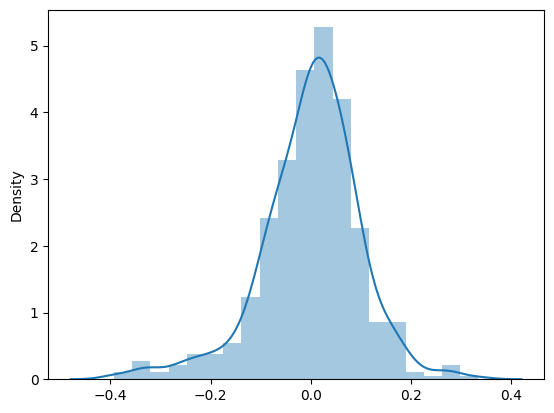

In [158]:
y_train_predict = lr.predict(X_train_lm)
res = (y_train - y_train_predict)
sns.distplot(res,bins=20)

**Observation**
- Shape of the error distribution is well formed as normalization curve. Hence we can say the model could fit good. 
- Lets continue to test the model with training data.

In [159]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_lm = X_train[['temp', 'yr', 'mnth', 'windspeed', 'rainy', 'mist_cloudy', 'summer']]
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.46
2,mnth,3.84
3,windspeed,3.00
1,yr,1.99
6,summer,1.56
5,mist_cloudy,1.47
4,rainy,1.07


- We will consider VIF value >5 to be more explainable by other variables hence removing temp variable.

In [160]:
X_train_lm = X_train[['yr', 'mnth', 'windspeed', 'rainy', 'mist_cloudy', 'summer']]
X_train_lm = sm.add_constant(X_train_lm)
lr1 = sm.OLS(y_train,X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     133.3
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.34e-100
Time:                        21:24:42   Log-Likelihood:                 281.21
No. Observations:                 510   AIC:                            -548.4
Df Residuals:                     503   BIC:                            -518.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3486      0.021     16.643      0.000       0.307       0.390
yr              0.2590      0.012     20.786      0.000       0.235       0.284
mnth            0.2526      0.021     11.913      0.000       0.211       0.294
windspeed      -0.2678      0.038     -7.124      0.000      -0.342      -0.194
rainy          -0.2853      0.037     -7.616      0.000      -0.359      -0.212
mist_cloudy    -0.0965      0.013     -7.302      0.000      -0.122      -0.071
summer          0.1364      0.015      8.914      0.000       0.106       0.167
==============================================================================
Omnibus:                       31.872   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.760
Skew:                          -0.559   Prob(JB):                     3.83e-09
Kurtosis:                       3.757   Cond. No.                         9.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation**
- if temp is removed R-square is falling to 0.614
- so lets evaluate both the models(lr and lr1) with test data

### Residual Analysis for train data

<Axes: ylabel='Density'>

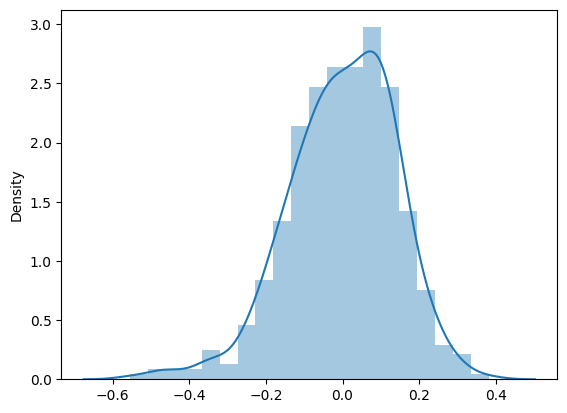

In [161]:
y_train_predict = lr1.predict(X_train_lm)
res = (y_train - y_train_predict)
sns.distplot(res,bins=20)

# Evaluating the LR models

In [162]:
data_test[variablesToScale] = scaler.transform(data_test[variablesToScale])
data_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,mist_cloudy,rainy,summer,fall,winter
184,0,0.545455,1,0.166667,0,0.831783,0.769660,0.657364,0.084219,3065,2978,0.692706,1,0,0,1,0
535,1,0.454545,0,0.500000,1,0.901354,0.842587,0.610133,0.153728,872,5339,0.712034,0,0,1,0,0
299,0,0.818182,0,0.666667,1,0.511964,0.496145,0.837699,0.334206,240,2419,0.303382,1,0,0,0,1
221,0,0.636364,0,0.500000,1,0.881625,0.795343,0.437098,0.339570,884,3896,0.547400,0,0,0,1,0
152,0,0.454545,0,0.666667,1,0.817246,0.741471,0.314298,0.537414,736,4232,0.569029,0,0,1,0,0


In [163]:
y_test = data_test.pop('cnt')
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [164]:
# y-predict with lr
X_test_lm = sm.add_constant(data_test[['temp', 'yr', 'mnth', 'windspeed', 'rainy', 'mist_cloudy', 'summer']])
y_predict = lr.predict(X_test_lm)
y_predict.head()

184    0.517670
535    0.913045
299    0.368105
221    0.585503
152    0.571780
dtype: float64

### Residual Analysis for test data with linear regression model lr

In [165]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.7400189940378541

<Axes: ylabel='Density'>

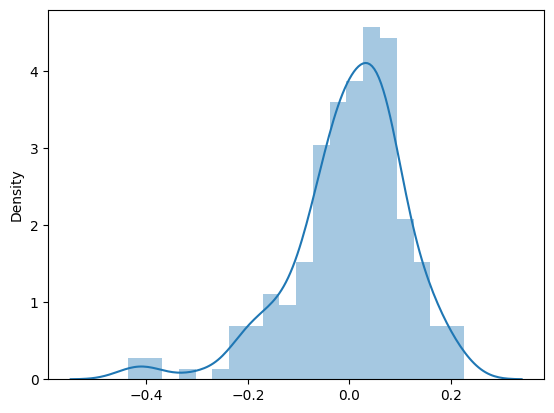

In [166]:
res = (y_test - y_predict)
sns.distplot(res,bins=20)

<Axes: >

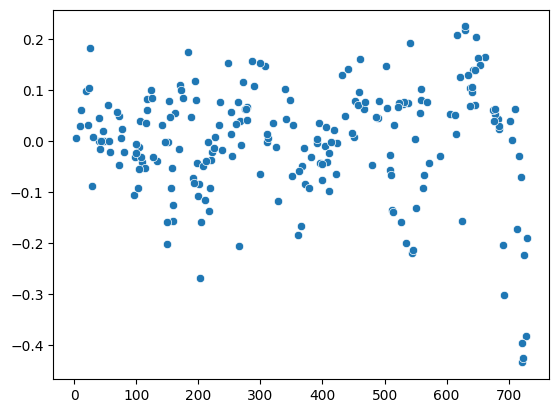

In [167]:
sns.scatterplot(res)

### Residual analysis for test data with Linear regression model lr1

r2_score:  0.4739626894311627


<Axes: ylabel='Density'>

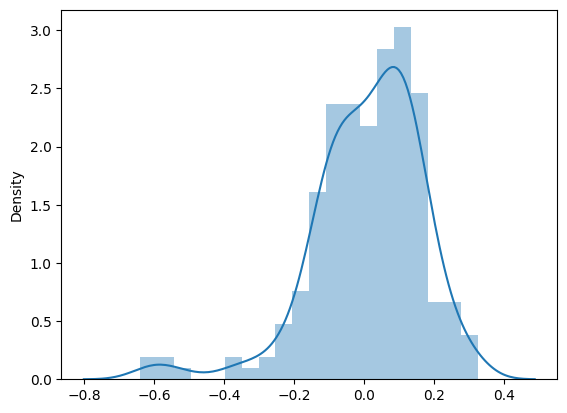

In [168]:
# y-predict with lr1
X_test_lm1 = sm.add_constant(data_test[[ 'yr', 'mnth', 'windspeed', 'rainy', 'mist_cloudy', 'summer']])
y_predict1 = lr1.predict(X_test_lm1)
print('r2_score: ', r2_score(y_test, y_predict1))
res = (y_test - y_predict1)
sns.distplot(res,bins=20)

<Axes: >

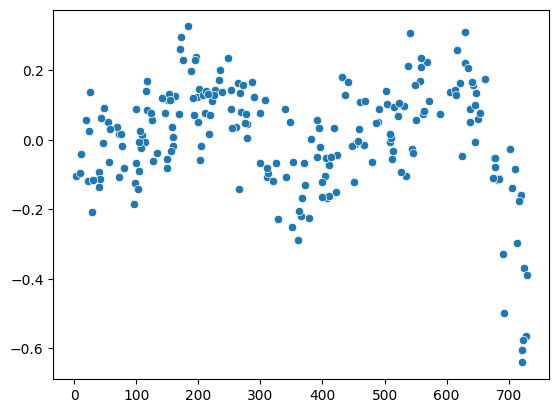

In [169]:
sns.scatterplot(res)

**Observation**
- Linear regression model **lr** seems to be promissing when compared to **lr1** based on the distribution of residuals and the R-square calculated.
- R-square calculated on test data by lr1 is much lower(47%) when compared to lr(74%) 
- *cnt = 0.131445 + temp(0.467968) + yr(0.236966) + mnth(0.155507) + windspeed(-0.169251) + rainy(-0.260112) + mist_cloudy(-0.073591) + summer(0.078163)*
- lr is explaining the variance of 80% on training data and 74% on test data.
- windspeed, rainy, cloudy days effect cnt negatively => they are inversely proportional to each other.

# Building a Linear Model using Backword method (RFE)

In [170]:
X_train.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,mist_cloudy,rainy,summer,fall,winter
653,1,0.818182,0,0.333333,1,0.509887,0.575354,0.300794,0,0,0,0,1
576,1,0.545455,0,0.333333,1,0.815169,0.725633,0.264686,0,0,0,1,0
426,1,0.181818,0,1.000000,0,0.442393,0.640189,0.255342,1,0,0,0,0
728,1,1.000000,0,0.000000,0,0.245101,0.498067,0.663106,0,0,0,0,0
482,1,0.272727,0,1.000000,0,0.395666,0.504508,0.188475,1,0,1,0,0


In [171]:
y_train.head()


653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [172]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [173]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('mnth', np.False_, np.int64(4)),
 ('holiday', np.True_, np.int64(1)),
 ('weekday', np.False_, np.int64(2)),
 ('workingday', np.False_, np.int64(3)),
 ('temp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('mist_cloudy', np.True_, np.int64(1)),
 ('rainy', np.True_, np.int64(1)),
 ('summer', np.True_, np.int64(1)),
 ('fall', np.True_, np.int64(1)),
 ('winter', np.True_, np.int64(1))]

In [174]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'mist_cloudy', 'rainy',
       'summer', 'fall', 'winter'],
      dtype='object')

In [175]:
X_train.columns[~rfe.support_]

Index(['mnth', 'weekday', 'workingday'], dtype='object')

# Building model with RFE selected cols

In [176]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfe).fit()
lm_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          4.78e-183
Time:                        21:24:44   Log-Likelihood:                 486.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     499   BIC:                            -903.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2178      0.028      7.788      0.000       0.163       0.273
yr              0.2307      0.008     27.186      0.000       0.214       0.247
holiday        -0.0865      0.027     -3.245      0.001      -0.139      -0.034
temp            0.4961      0.035     14.324      0.000       0.428       0.564
hum            -0.1390      0.039     -3.548      0.000      -0.216      -0.062
windspeed      -0.1827      0.027     -6.794      0.000      -0.236      -0.130
mist_cloudy    -0.0537      0.011     -4.889      0.000      -0.075      -0.032
rainy          -0.2409      0.028     -8.751      0.000      -0.295      -0.187
summer          0.1168      0.015      7.554      0.000       0.086       0.147
fall            0.0746      0.021      3.597      0.000       0.034       0.115
winter          0.1630      0.013     12.350      0.000       0.137       0.189
==============================================================================
Omnibus:                       64.105   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.041
Skew:                          -0.644   Prob(JB):                     1.07e-35
Kurtosis:                       5.433   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.87
9,fall,4.78
3,temp,3.50
8,summer,2.54
4,hum,1.87
10,winter,1.87
6,mist_cloudy,1.56
7,rainy,1.24
5,windspeed,1.19
1,yr,1.03


**Observation**
- for the above model all the vif of variables are below 5 with p-value 0

r2_score:  0.8271752862671113


<Axes: ylabel='Density'>

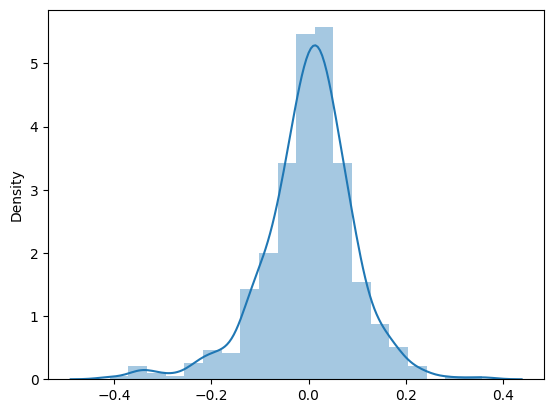

In [178]:
y_train_predict = lm_rfe.predict(X_train_rfe)
print('r2_score: ', r2_score(y_train, y_train_predict))
res = (y_train - y_train_predict)
sns.distplot(res,bins=20)

<Axes: >

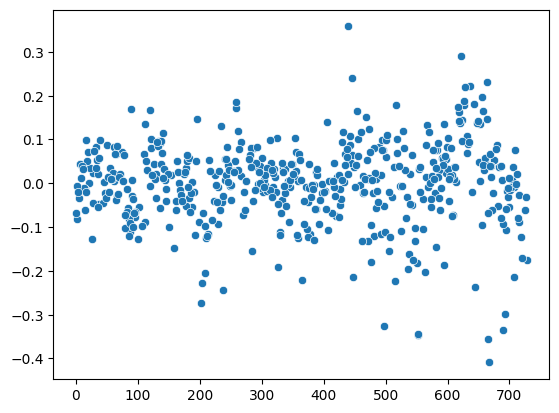

In [179]:
sns.scatterplot(res)

r2_score:  0.8063526208371381


<Axes: ylabel='Density'>

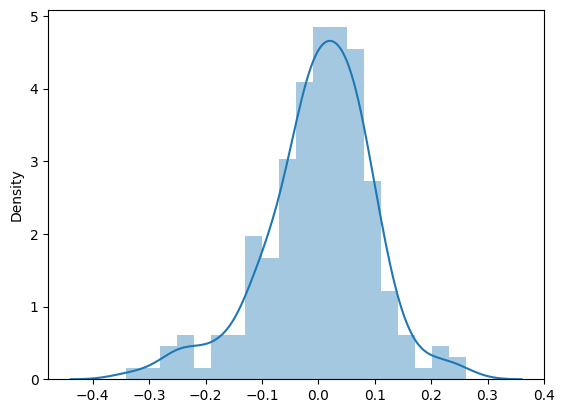

In [180]:
data_test.head()
X_test_rfe = data_test[col]
X_test_rfe = sm.add_constant(X_test_rfe)
y_test_predict = lm_rfe.predict(X_test_rfe)
print('r2_score: ', r2_score(y_test, y_test_predict))
res = (y_test - y_test_predict)
sns.distplot(res,bins=20)

<Axes: >

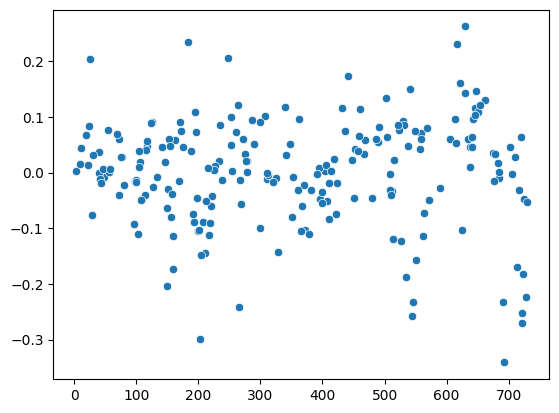

In [181]:
sns.scatterplot(res)

In [182]:
X_train_rfe1 = X_train[col]
X_train_rfe1.pop('fall')
X_train_rfe1 = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train,X_train_rfe1).fit()
lm_rfe1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     257.8
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.68e-181
Time:                        21:24:45   Log-Likelihood:                 479.63
No. Observations:                 510   AIC:                            -939.3
Df Residuals:                     500   BIC:                            -896.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2134      0.028      7.546      0.000       0.158       0.269
yr              0.2285      0.009     26.683      0.000       0.212       0.245
holiday        -0.0883      0.027     -3.273      0.001      -0.141      -0.035
temp            0.5965      0.021     28.753      0.000       0.556       0.637
hum            -0.1538      0.039     -3.902      0.000      -0.231      -0.076
windspeed      -0.1940      0.027     -7.178      0.000      -0.247      -0.141
mist_cloudy    -0.0502      0.011     -4.531      0.000      -0.072      -0.028
rainy          -0.2327      0.028     -8.383      0.000      -0.287      -0.178
summer          0.0756      0.011      7.195      0.000       0.055       0.096
winter          0.1356      0.011     12.426      0.000       0.114       0.157
==============================================================================
Omnibus:                       54.300   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.428
Skew:                          -0.563   Prob(JB):                     7.85e-29
Kurtosis:                       5.196   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.79
4,hum,1.85
6,mist_cloudy,1.55
9,winter,1.25
7,rainy,1.23
3,temp,1.23
5,windspeed,1.18
8,summer,1.14
1,yr,1.03
2,holiday,1.01


r2_score:  0.8226945215661686


Text(0.5, 1.0, 'Residual Analysis with train data')

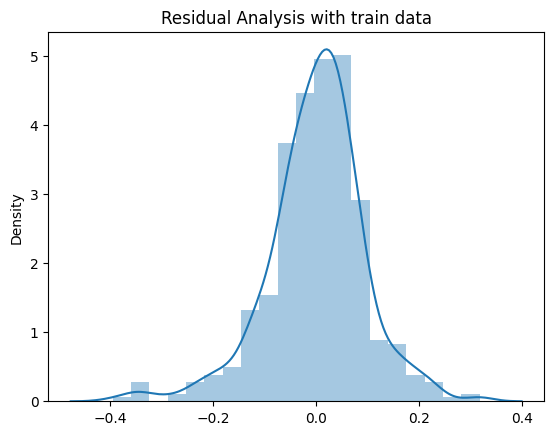

In [189]:
y_train_predict = lm_rfe1.predict(X_train_rfe1)
print('r2_score: ', r2_score(y_train, y_train_predict))
res = (y_train - y_train_predict)
sns.distplot(res,bins=20).set_title("Residual Analysis with train data")

Text(0.5, 1.0, 'scatter plot for training data residuals')

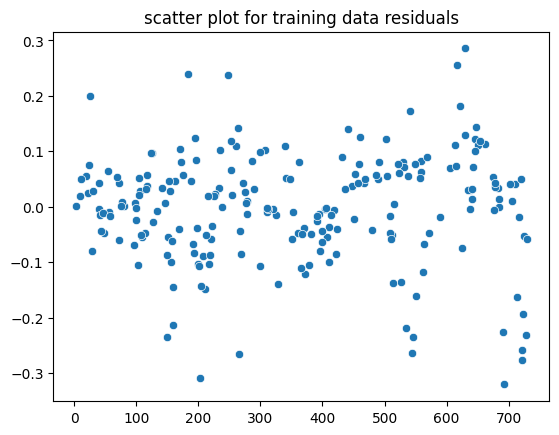

In [191]:
sns.scatterplot(res).set_title("scatter plot for training data residuals")

r2_score:  0.792434653431222


Text(0.5, 1.0, 'Residual Analysis with test data')

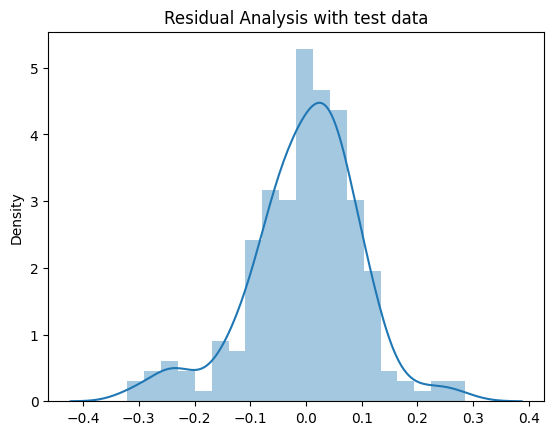

In [190]:
data_test.head()
X_test_rfe1 = data_test[col]
X_test_rfe1.head()
X_test_rfe1.pop('fall')
X_test_rfe1 = sm.add_constant(X_test_rfe1)
y_test_predict = lm_rfe1.predict(X_test_rfe1)
print('r2_score: ', r2_score(y_test, y_test_predict))
res = (y_test - y_test_predict)
sns.distplot(res,bins=20).set_title("Residual Analysis with test data")

Text(0.5, 1.0, 'scatter plot for training data residuals')

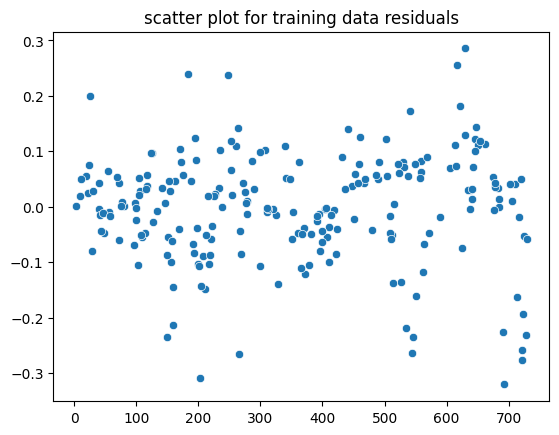

In [192]:
sns.scatterplot(res).set_title("scatter plot for training data residuals")

In [188]:
lm_rfe1.params

const          0.213365
yr             0.228534
holiday       -0.088259
temp           0.596490
hum           -0.153819
windspeed     -0.193985
mist_cloudy   -0.050166
rainy         -0.232719
summer         0.075578
winter         0.135617
dtype: float64

# Conclusion
# *Above coefficients formed with datamodel lm_rfe1 explains the data and its variance very well with vif<2 for all variables and variance explained up to ~80%*
- The equation formed would be
    - ## *cnt = 0.213365 + yr(0.228534) + holiday(-0.088259) + temp(0.596490) + hum(-0.153819) + windspeed(-0.193985) + mist_cloudy(-0.050166) + rainy(-0.232719) + summer(0.075578) + winter(0.135617)*
- year, temperature, summer and winter are directly proportional to count wheres holiday, humidity, cloudy day, rainy days impacted the count inversely.